In [1]:
%reset

Once deleted, variables cannot be recovered. Proceed (y/[n])? y


#  1. Data Exploration

In [2]:
%load_ext autoreload
%aimport data_prep
%run data_prep.py
%autoreload 1

In [3]:
from IPython.display import Image
from matplotlib import pyplot as plt
import scipy.stats as stats

In [4]:
#Load Datasets
train_data = pd.read_csv("original_datasets/training_set_values.csv")
train_labels = pd.read_csv("original_datasets/training_set_labels.csv")
test_data = pd.read_csv("original_datasets/test_set_values.csv")


In [5]:
#Join Labels with Train data
train_labels = train_labels.drop(columns='id')
train_data = train_data.join(train_labels)


In [6]:
train_data.head()

id  amount_tsh date_recorded        funder  gps_height     installer  \
0  69572      6000.0    2011-03-14         Roman        1390         Roman   
1   8776         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2  34310        25.0    2013-02-25  Lottery Club         686  World vision   
3  67743         0.0    2013-01-28        Unicef         263        UNICEF   
4  19728         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private       ...        \
0  34.938093  -9.856322                  none            0       ...         
1  34.698766  -2.147466              Zahanati            0       ...         
2  37.460664  -3.821329           Kwa Mahundi            0       ...         
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0       ...         
4  31.130847  -1.825359               Shuleni            0       ...         

  water_quality quality_group      quantity  quantity_group  \
0          soft          good        enough          enough   
1          soft          good  insufficient    insufficient   
2          soft          good        enough          enough   
3          soft          good           dry             dry   
4          soft          good      seasonal        seasonal   

                 source           source_type source_class  \
0                spring                spring  groundwater   
1  rainwater harvesting  rainwater harvesting      surface   
2                   dam                   dam      surface   
3           machine dbh              borehole  groundwater   
4  rainwater harvesting  rainwater harvesting      surface   

               waterpoint_type waterpoint_type_group    status_group  
0           communal standpipe    communal standpipe      functional  
1           communal standpipe    communal standpipe      functional  
2  communal standpipe multiple    communal standpipe      functional  
3  communal standpipe multiple    communal standpipe  non functional  
4           communal standpipe    communal standpipe      functional  

[5 rows x 41 columns]

In [7]:
test_data.head()

id  amount_tsh date_recorded                  funder  gps_height  \
0  50785         0.0    2013-02-04                    Dmdd        1996   
1  51630         0.0    2013-02-04  Government Of Tanzania        1569   
2  17168         0.0    2013-02-01                     NaN        1567   
3  45559         0.0    2013-01-22              Finn Water         267   
4  49871       500.0    2013-03-27                  Bruder        1260   

    installer  longitude   latitude                 wpt_name  num_private  \
0        DMDD  35.290799  -4.059696  Dinamu Secondary School            0   
1         DWE  36.656709  -3.309214                  Kimnyak            0   
2         NaN  34.767863  -5.004344           Puma Secondary            0   
3  FINN WATER  38.058046  -9.418672           Kwa Mzee Pange            0   
4      BRUDER  35.006123 -10.950412          Kwa Mzee Turuka            0   

           ...          payment_type water_quality quality_group  \
0          ...             never pay          soft          good   
1          ...             never pay          soft          good   
2          ...             never pay          soft          good   
3          ...               unknown          soft          good   
4          ...               monthly          soft          good   

       quantity  quantity_group                source           source_type  \
0      seasonal        seasonal  rainwater harvesting  rainwater harvesting   
1  insufficient    insufficient                spring                spring   
2  insufficient    insufficient  rainwater harvesting  rainwater harvesting   
3           dry             dry          shallow well          shallow well   
4        enough          enough                spring                spring   

   source_class     waterpoint_type waterpoint_type_group  
0       surface               other                 other  
1   groundwater  communal standpipe    communal standpipe  
2       surface               other                 other  
3   groundwater               other                 other  
4   groundwater  communal standpipe    communal standpipe  

[5 rows x 40 columns]

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 59400 entries, 0 to 59399
Data columns (total 41 columns):
id                       59400 non-null int64
amount_tsh               59400 non-null float64
date_recorded            59400 non-null object
funder                   55765 non-null object
gps_height               59400 non-null int64
installer                55745 non-null object
longitude                59400 non-null float64
latitude                 59400 non-null float64
wpt_name                 59400 non-null object
num_private              59400 non-null int64
basin                    59400 non-null object
subvillage               59029 non-null object
region                   59400 non-null object
region_code              59400 non-null int64
district_code            59400 non-null int64
lga                      59400 non-null object
ward                     59400 non-null object
population               59400 non-null int64
public_meeting           56066 non-null object
r

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14850 entries, 0 to 14849
Data columns (total 40 columns):
id                       14850 non-null int64
amount_tsh               14850 non-null float64
date_recorded            14850 non-null object
funder                   13981 non-null object
gps_height               14850 non-null int64
installer                13973 non-null object
longitude                14850 non-null float64
latitude                 14850 non-null float64
wpt_name                 14850 non-null object
num_private              14850 non-null int64
basin                    14850 non-null object
subvillage               14751 non-null object
region                   14850 non-null object
region_code              14850 non-null int64
district_code            14850 non-null int64
lga                      14850 non-null object
ward                     14850 non-null object
population               14850 non-null int64
public_meeting           14029 non-null object
r

In [10]:
#Drop id and recorded from train dataset 
train_data= train_data.drop(columns=['id'])
train_data= train_data.drop(columns=['recorded_by'])


In [11]:
#Drop id and recorded from test dataset 
test_data= test_data.drop(columns=['id'])
test_data= test_data.drop(columns=['recorded_by'])

In [12]:
# Differentiate categorical from numerical variables, even though some are encoded already,
num_train_data = train_data[[
'amount_tsh',
'gps_height',
'num_private',
'population',
]]

other_train_data = train_data[[ 
'longitude',
'latitude',
'date_recorded',
]]
    
categorical_columns = list(set(train_data.columns) - set(num_train_data.columns) - set(other_train_data.columns))
cat_train_data = train_data.loc[:,categorical_columns]


In [13]:
train_data.head()


amount_tsh date_recorded        funder  gps_height     installer  \
0      6000.0    2011-03-14         Roman        1390         Roman   
1         0.0    2013-03-06       Grumeti        1399       GRUMETI   
2        25.0    2013-02-25  Lottery Club         686  World vision   
3         0.0    2013-01-28        Unicef         263        UNICEF   
4         0.0    2011-07-13   Action In A           0       Artisan   

   longitude   latitude              wpt_name  num_private  \
0  34.938093  -9.856322                  none            0   
1  34.698766  -2.147466              Zahanati            0   
2  37.460664  -3.821329           Kwa Mahundi            0   
3  38.486161 -11.155298  Zahanati Ya Nanyumbu            0   
4  31.130847  -1.825359               Shuleni            0   

                     basin       ...       water_quality quality_group  \
0               Lake Nyasa       ...                soft          good   
1            Lake Victoria       ...                soft          good   
2                  Pangani       ...                soft          good   
3  Ruvuma / Southern Coast       ...                soft          good   
4            Lake Victoria       ...                soft          good   

       quantity  quantity_group                source           source_type  \
0        enough          enough                spring                spring   
1  insufficient    insufficient  rainwater harvesting  rainwater harvesting   
2        enough          enough                   dam                   dam   
3           dry             dry           machine dbh              borehole   
4      seasonal        seasonal  rainwater harvesting  rainwater harvesting   

   source_class              waterpoint_type waterpoint_type_group  \
0   groundwater           communal standpipe    communal standpipe   
1       surface           communal standpipe    communal standpipe   
2       surface  communal standpipe multiple    communal standpipe   
3   groundwater  communal standpipe multiple    communal standpipe   
4       surface           communal standpipe    communal standpipe   

     status_group  
0      functional  
1      functional  
2      functional  
3  non functional  
4      functional  

[5 rows x 39 columns]

In [14]:
train_data_missing = train_data.isna()
train_data_missing = (train_data_missing.sum()/len(train_data))*100
train_data_missing = train_data_missing[train_data_missing!=0]
train_data_missing

funder                6.119529
installer             6.153199
subvillage            0.624579
public_meeting        5.612795
scheme_management     6.526936
scheme_name          47.417508
permit                5.144781
dtype: float64

In [15]:
column_list = cat_train_data.columns.values.tolist()
print(column_list)

['waterpoint_type_group', 'scheme_management', 'payment', 'quality_group', 'payment_type', 'source_class', 'subvillage', 'extraction_type', 'management_group', 'quantity', 'scheme_name', 'source', 'waterpoint_type', 'quantity_group', 'extraction_type_class', 'permit', 'installer', 'status_group', 'extraction_type_group', 'region', 'wpt_name', 'water_quality', 'funder', 'construction_year', 'source_type', 'lga', 'public_meeting', 'basin', 'region_code', 'district_code', 'ward', 'management']


In [16]:
def unique_values(df):
    for column_name in column_list:
        return print(df[column_name].unique())

In [17]:
for column_name in column_list:
      print(column_name,len(train_data[column_name].unique()),train_data[column_name].unique())


waterpoint_type_group 6 ['communal standpipe' 'hand pump' 'other' 'improved spring'
 'cattle trough' 'dam']
scheme_management 13 ['VWC' 'Other' nan 'Private operator' 'WUG' 'Water Board' 'WUA'
 'Water authority' 'Company' 'Parastatal' 'Trust' 'SWC' 'None']
payment 7 ['pay annually' 'never pay' 'pay per bucket' 'unknown'
 'pay when scheme fails' 'other' 'pay monthly']
quality_group 6 ['good' 'salty' 'milky' 'unknown' 'fluoride' 'colored']
payment_type 7 ['annually' 'never pay' 'per bucket' 'unknown' 'on failure' 'other'
 'monthly']
source_class 3 ['groundwater' 'surface' 'unknown']
subvillage 19288 ['Mnyusi B' 'Nyamara' 'Majengo' ... 'Itete B' 'Maore Kati' 'Kikatanyemba']
extraction_type 18 ['gravity' 'submersible' 'swn 80' 'nira/tanira' 'india mark ii' 'other'
 'ksb' 'mono' 'windmill' 'afridev' 'other - rope pump' 'india mark iii'
 'other - swn 81' 'other - play pump' 'cemo' 'climax' 'walimi'
 'other - mkulima/shinyanga']
management_group 5 ['user-group' 'other' 'commercial' 'parastata

In [18]:
#Fields that require intensive review are: installer, funder, scheme_name, ward, lga, wpt_name, subvillage
grouping_col = train_data[[
'installer',
'funder',
'scheme_name',
'ward',
'lga',
'wpt_name',
'subvillage'
]]

In [19]:
for i in train_data.columns:
    inspect = train_data[i].value_counts()/len(train_data)
    print(inspect.head(10))

0.0       0.700993
500.0     0.052222
50.0      0.041616
1000.0    0.025051
20.0      0.024630
200.0     0.020539
100.0     0.013737
10.0      0.013569
30.0      0.012508
2000.0    0.011852
Name: amount_tsh, dtype: float64
2011-03-15    0.009630
2011-03-17    0.009394
2013-02-03    0.009192
2011-03-14    0.008754
2011-03-16    0.008636
2011-03-18    0.008367
2011-03-19    0.007845
2013-02-04    0.007811
2013-01-29    0.007727
2011-03-04    0.007710
Name: date_recorded, dtype: float64
Government Of Tanzania    0.152929
Danida                    0.052424
Hesawa                    0.037071
Rwssp                     0.023131
World Bank                0.022710
Kkkt                      0.021667
World Vision              0.020976
Unicef                    0.017795
Tasaf                     0.014764
District Council          0.014192
Name: funder, dtype: float64
 0       0.344074
-15      0.001010
-16      0.000926
-13      0.000926
-20      0.000875
 1290    0.000875
-14      0.000859
 303  

In [20]:
#Fields that require intensive review are: installer, funder, scheme_name, ward, lga, wpt_name, subvillage
grouping_col = train_data[['basin',
       'subvillage', 'region', 'region_code', 'district_code', 'lga', 'ward','extraction_type',
       'extraction_type_group', 'extraction_type_class', 'management',
       'management_group', 'payment', 'payment_type', 'water_quality',
       'quality_group', 'quantity', 'quantity_group', 'source', 'source_type',
       'source_class', 'waterpoint_type', 'waterpoint_type_group']]

In [21]:
def cramers_corrected_stat(confusion_matrix):
    chi2 = stats.chi2_contingency(confusion_matrix)[0]
    n = confusion_matrix.sum().sum()
    phi2 = chi2/n
    r,k = confusion_matrix.shape
    phi2corr = max(0, phi2 - ((k-1)*(r-1))/(n-1))
    rcorr = r - ((r-1)**2)/(n-1)
    kcorr = k - ((k-1)**2)/(n-1)
    return np.sqrt(phi2corr / min( (kcorr-1), (rcorr-1)))

def show_similars(cols, threshold=0.90):
    for i1, col1 in enumerate(cols):
        for i2, col2 in enumerate(cols):
            if (i1<i2):
                cm12 = pd.crosstab(train_data[col1], train_data[col2]).values # contingency table
                cv12 = cramers_corrected_stat(cm12) # Cramer V statistic
                if (cv12 > threshold):
                    print((col1, col2), int(cv12*100))

In [22]:
show_similars(grouping_col, 0.95)

('basin', 'ward') 95
('region', 'region_code') 99
('region', 'lga') 99
('region', 'ward') 96
('region_code', 'lga') 97
('lga', 'ward') 96
('extraction_type', 'extraction_type_group') 99
('extraction_type', 'extraction_type_class') 99
('extraction_type_group', 'extraction_type_class') 99
('management', 'management_group') 99
('payment', 'payment_type') 100
('water_quality', 'quality_group') 99
('quantity', 'quantity_group') 100
('source', 'source_type') 99
('source', 'source_class') 99
('source_type', 'source_class') 99
('waterpoint_type', 'waterpoint_type_group') 99


#  Exploratory Data Analysis 

Text(0, 0.5, 'Percentage')

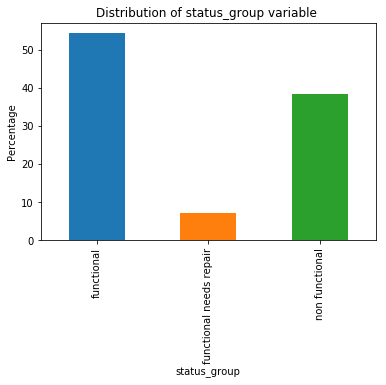

In [23]:
plt.show()
ax = ((train_data.status_group.value_counts().sort_index()/len(train_data))*100).plot(kind='bar')
plt.title('Distribution of status_group variable ')
plt.xlabel('status_group')
plt.ylabel('Percentage')

In [24]:
functional = len(train_data[train_data['status_group']=='functional'])
func_need_repair = len(train_data[train_data['status_group']=='functional needs repair'])
non_func = len(train_data[train_data['status_group']=='non functional'])

pct_functional = functional/(functional+func_need_repair+non_func)
print("percentage of functional is", pct_functional*100)
pct_func_need_repair = func_need_repair/(functional+func_need_repair+non_func)
print("percentage of functional needs repair", pct_func_need_repair*100)
pct_non_func = non_func/(functional+func_need_repair+non_func)
print("percentage of non functional", pct_non_func*100)

percentage of functional is 54.3080808080808
percentage of functional needs repair 7.267676767676767
percentage of non functional 38.42424242424242


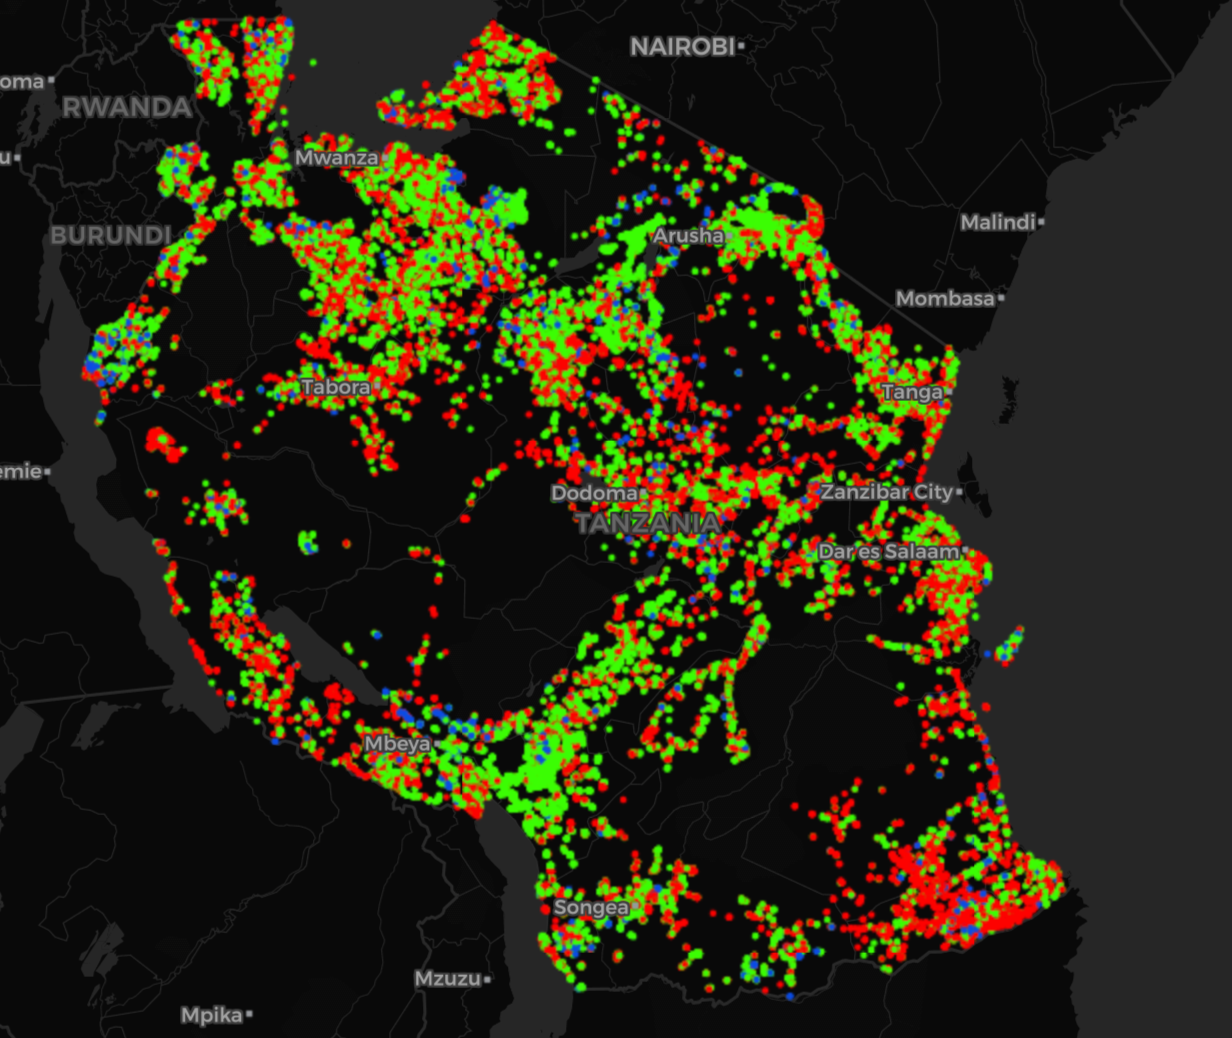

In [25]:
Image(filename = "Viz/map.png", width=600, height=800)

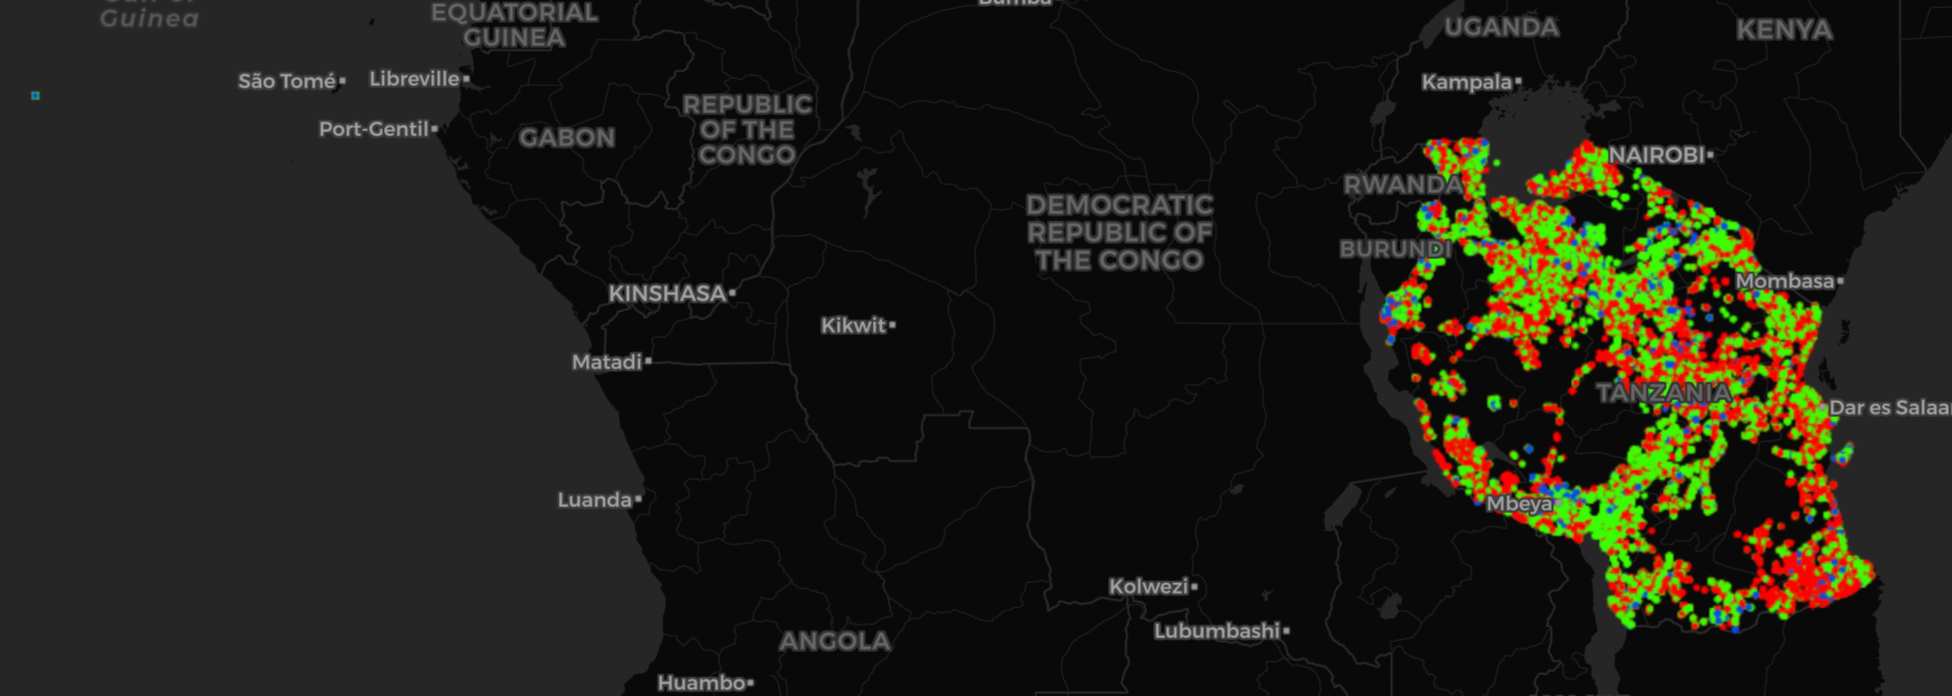

In [26]:
Image(filename = "Viz/outliers.png", width=600, height=800)

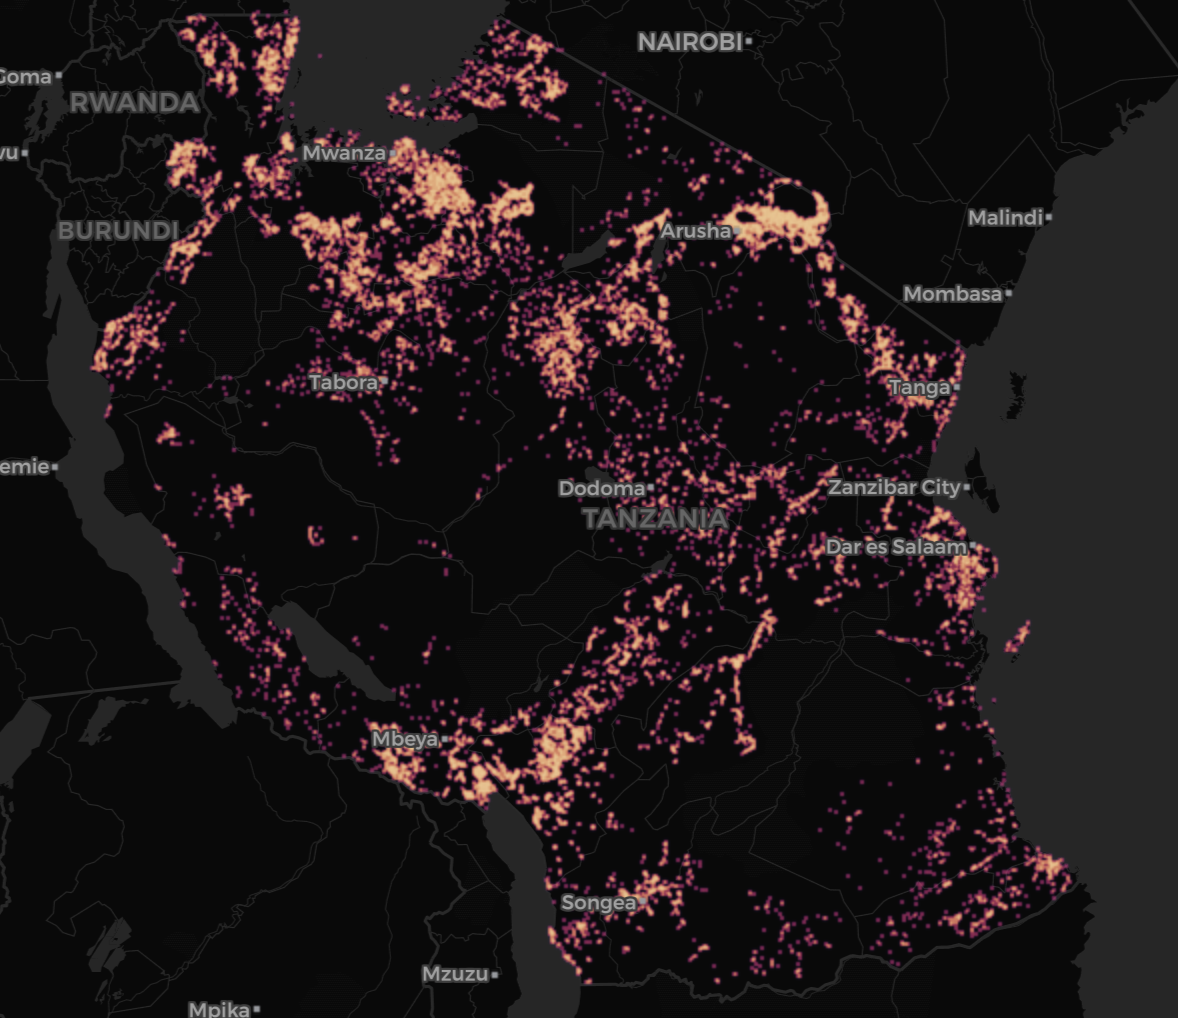

In [27]:
Image(filename = "Viz/Functional_heatmap.png", width=600, height=800)

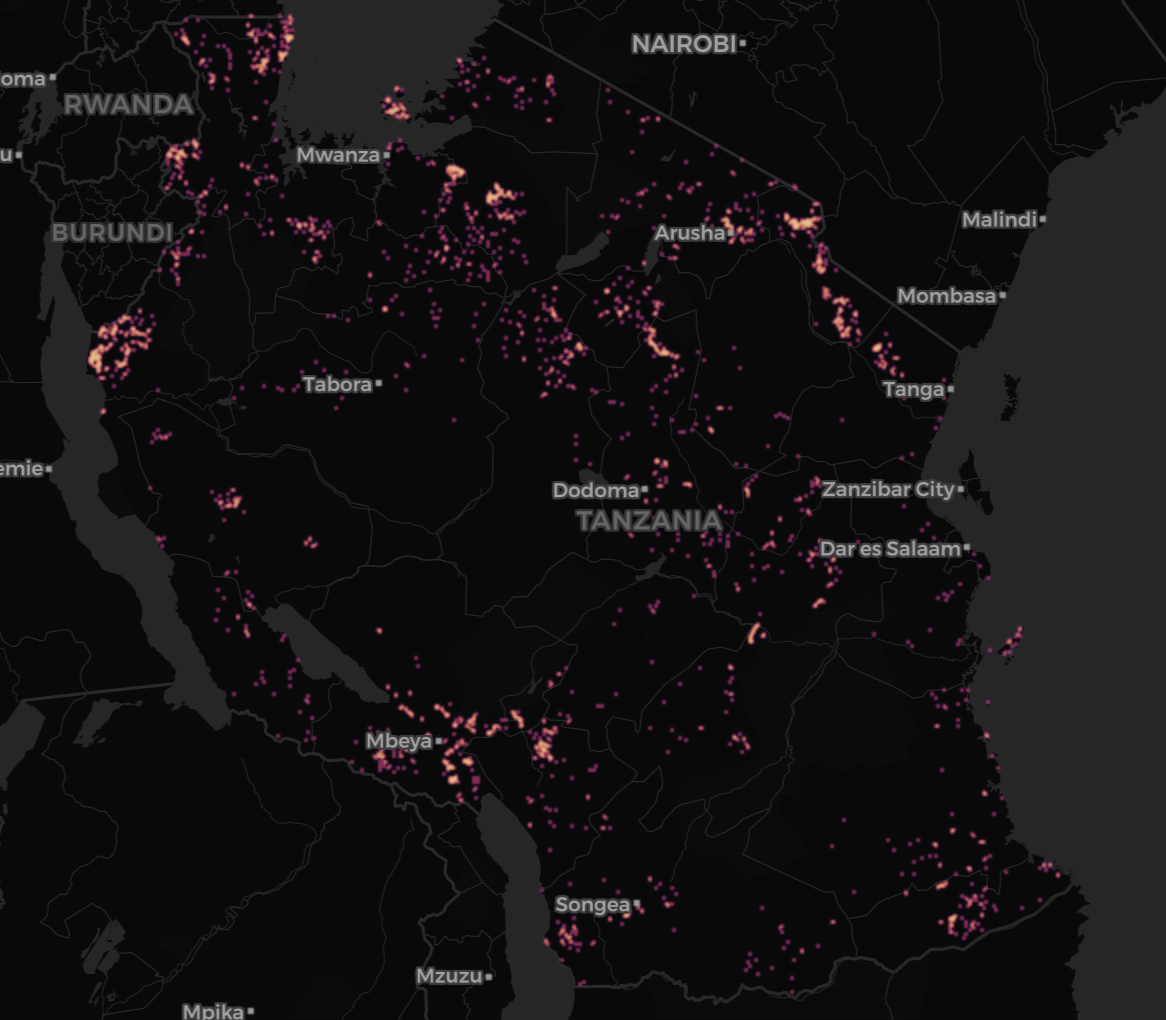

In [28]:
Image(filename = "Viz/needs_repair_heatmap.png", width=600, height=800)

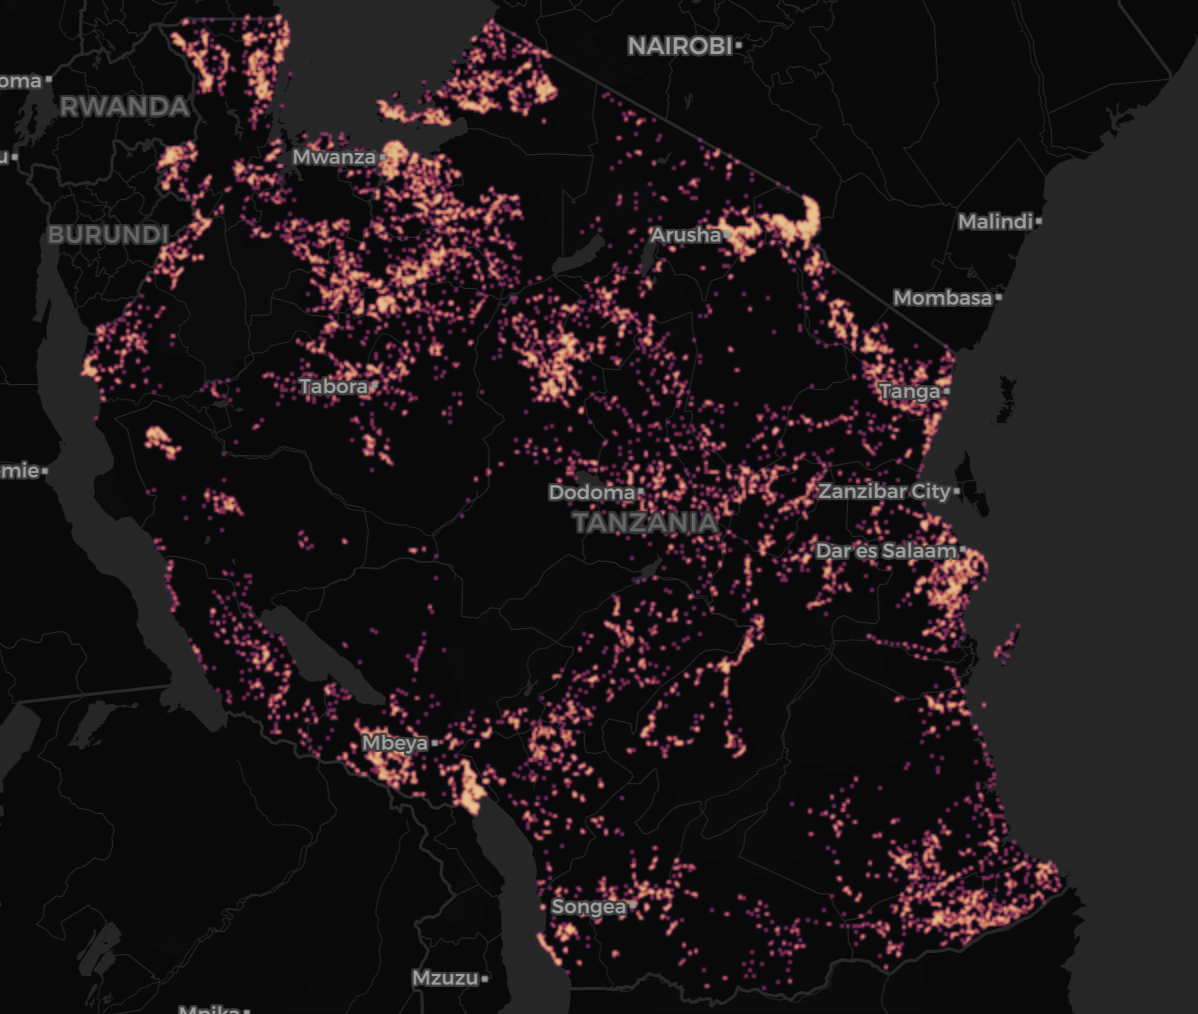

In [29]:
Image(filename = "Viz/non-functional_heatmap.png", width=600, height=800)

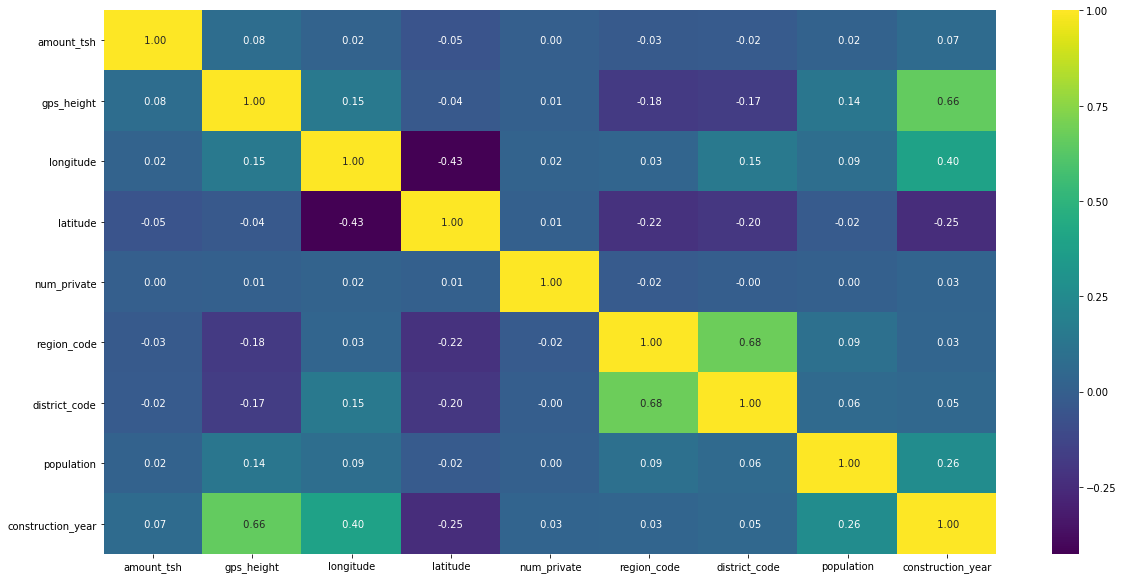

In [30]:
plt.figure(figsize=(20,10))
sns.heatmap(train_data.corr(),cbar=True,fmt =' .2f', annot=True, cmap='viridis')

Text(0, 0.5, 'Percentage')

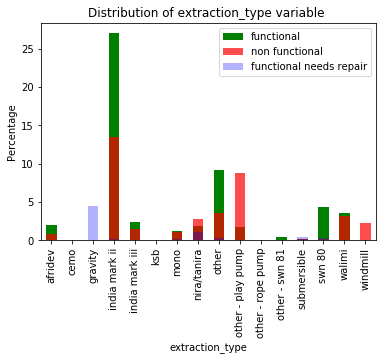

In [31]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type')
((train_data[train_data.status_group=='non functional'].extraction_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', alpha= 0.7,x='extraction_type')
((train_data[train_data.status_group=='functional needs repair'].extraction_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='extraction_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of extraction_type variable ')
plt.xlabel('extraction_type')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

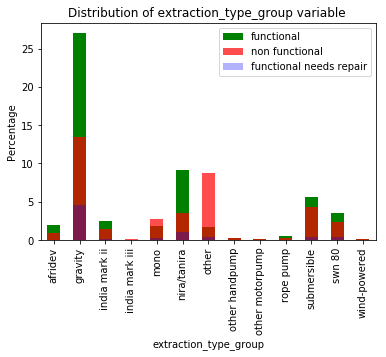

In [32]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_group')
((train_data[train_data.status_group=='non functional'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r',alpha= 0.7, x='extraction_type_group')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='extraction_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of extraction_type_group variable ')
plt.xlabel('extraction_type_group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

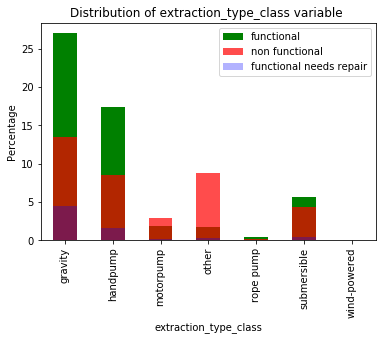

In [33]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='extraction_type_class')
((train_data[train_data.status_group=='non functional'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r',alpha= 0.7, x='extraction_type_class')
((train_data[train_data.status_group=='functional needs repair'].extraction_type_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='extraction_type_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of extraction_type_class variable ')
plt.xlabel('extraction_type_class')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

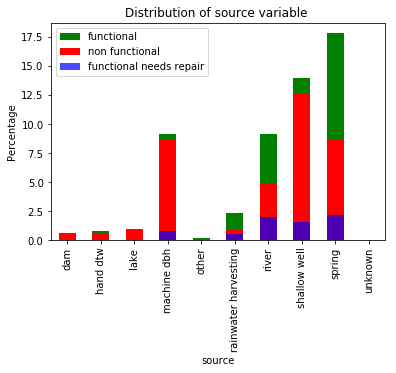

In [34]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source')
((train_data[train_data.status_group=='non functional'].source.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source')
((train_data[train_data.status_group=='functional needs repair'].source.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of source variable ')
plt.xlabel('source')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

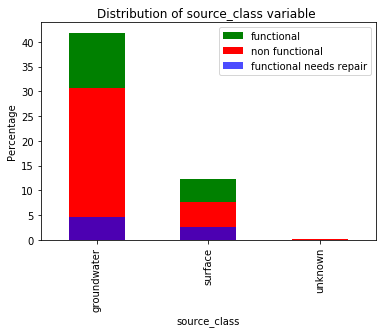

In [35]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_class')
((train_data[train_data.status_group=='non functional'].source_class.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_class')
((train_data[train_data.status_group=='functional needs repair'].source_class.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_class')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of source_class variable ')
plt.xlabel('source_class')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

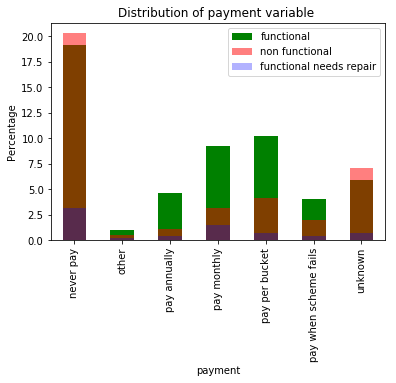

In [36]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment')
((train_data[train_data.status_group=='non functional'].payment.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='payment',alpha= 0.5,)
((train_data[train_data.status_group=='functional needs repair'].payment.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='payment')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of payment variable ')
plt.xlabel('payment')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

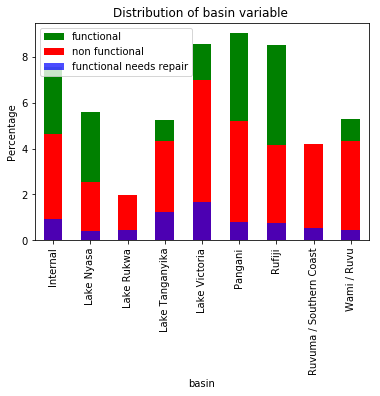

In [37]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='basin')
((train_data[train_data.status_group=='non functional'].basin.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='basin')
((train_data[train_data.status_group=='functional needs repair'].basin.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='basin')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of basin variable ')
plt.xlabel('basin')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

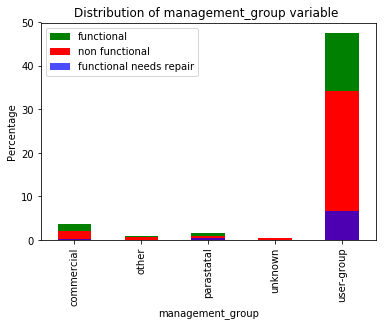

In [38]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management_group')
((train_data[train_data.status_group=='non functional'].management_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management_group')
((train_data[train_data.status_group=='functional needs repair'].management_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of management_group variable ')
plt.xlabel('management_group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

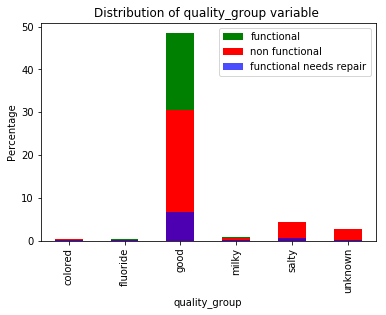

In [39]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of quality_group variable ')
plt.xlabel('quality_group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

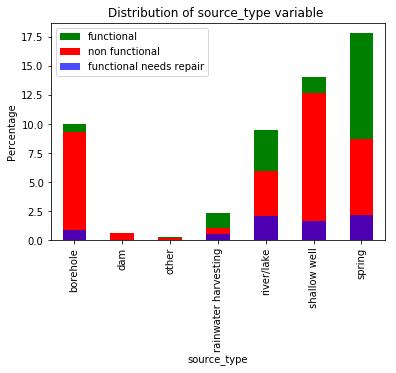

In [40]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='source_type')
((train_data[train_data.status_group=='non functional'].source_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='source_type')
((train_data[train_data.status_group=='functional needs repair'].source_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='source_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of source_type variable ')
plt.xlabel('source_type')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

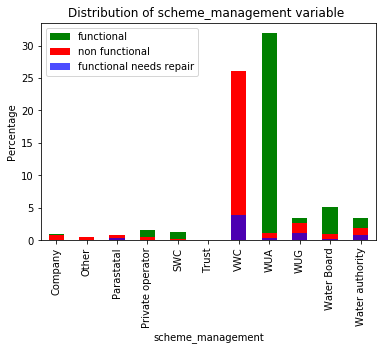

In [41]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='scheme_management')
((train_data[train_data.status_group=='non functional'].scheme_management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='scheme_management')
((train_data[train_data.status_group=='functional needs repair'].scheme_management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='scheme_management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of scheme_management variable ')
plt.xlabel('scheme_management')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

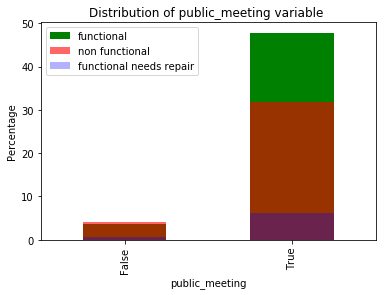

In [42]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='public_meeting')
((train_data[train_data.status_group=='non functional'].public_meeting.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r',alpha= 0.6, x='public_meeting')
((train_data[train_data.status_group=='functional needs repair'].public_meeting.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='public_meeting')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of public_meeting variable ')
plt.xlabel('public_meeting')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

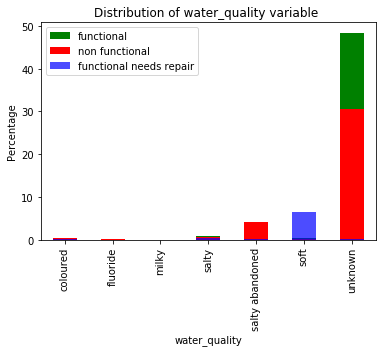

In [43]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='water_quality')
((train_data[train_data.status_group=='non functional'].water_quality.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='water_quality')
((train_data[train_data.status_group=='functional needs repair'].water_quality.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='water_quality')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of water_quality variable ')
plt.xlabel('water_quality')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

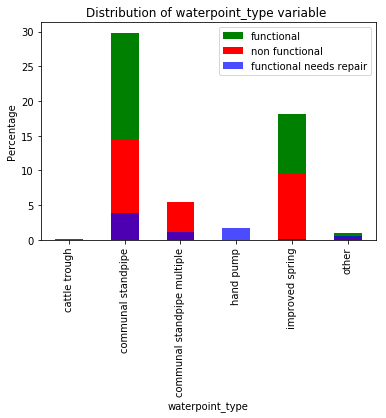

In [44]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type')
((train_data[train_data.status_group=='non functional'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of waterpoint_type variable ')
plt.xlabel('waterpoint_type')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

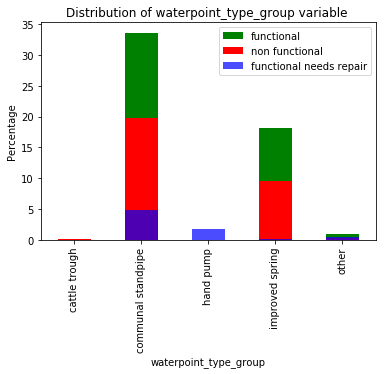

In [45]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='waterpoint_type_group')
((train_data[train_data.status_group=='non functional'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='waterpoint_type_group')
((train_data[train_data.status_group=='functional needs repair'].waterpoint_type_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='waterpoint_type_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of waterpoint_type_group variable ')
plt.xlabel('waterpoint_type_group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

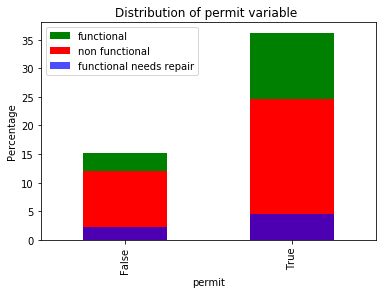

In [46]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='permit')
((train_data[train_data.status_group=='non functional'].permit.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='permit')
((train_data[train_data.status_group=='functional needs repair'].permit.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='permit')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of permit variable ')
plt.xlabel('permit')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

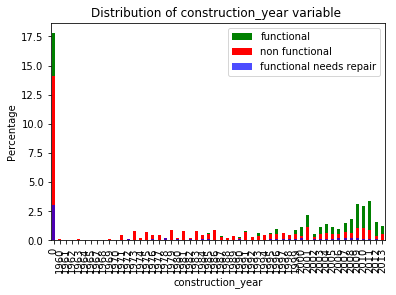

In [47]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='construction_year')
((train_data[train_data.status_group=='non functional'].construction_year.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='construction_year')
((train_data[train_data.status_group=='functional needs repair'].construction_year.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='construction_year')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of construction_year variable ')
plt.xlabel('construction_year')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

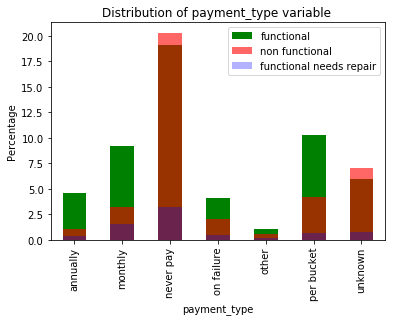

In [48]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='payment_type')
((train_data[train_data.status_group=='non functional'].payment_type.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r',alpha= 0.6, x='payment_type')
((train_data[train_data.status_group=='functional needs repair'].payment_type.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='payment_type')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of payment_type variable ')
plt.xlabel('payment_type')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

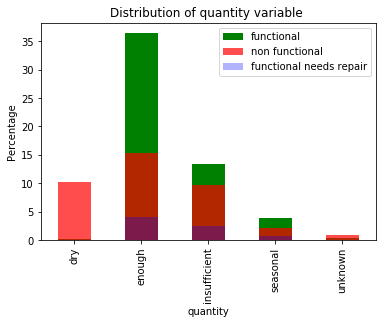

In [49]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quantity')
((train_data[train_data.status_group=='non functional'].quantity.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',alpha= 0.7,color='r', x='quantity')
((train_data[train_data.status_group=='functional needs repair'].quantity.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='quantity')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of quantity variable ')
plt.xlabel('quantity')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

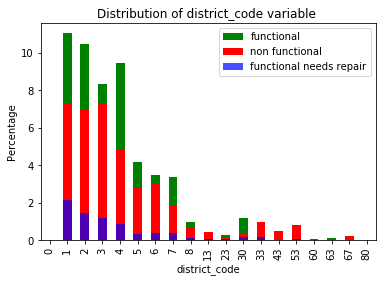

In [50]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='district_code')
((train_data[train_data.status_group=='non functional'].district_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='district_code')
((train_data[train_data.status_group=='functional needs repair'].district_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='district_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of district_code variable ')
plt.xlabel('district_code')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

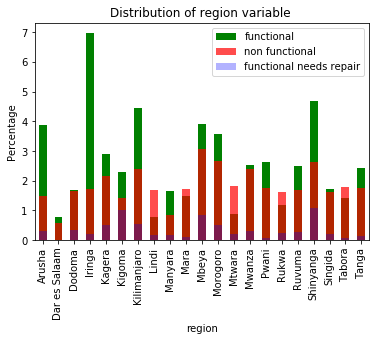

In [51]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region')
((train_data[train_data.status_group=='non functional'].region.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', alpha= 0.7,x='region')
((train_data[train_data.status_group=='functional needs repair'].region.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.3, ax= ax, x='region')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of region variable ')
plt.xlabel('region')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

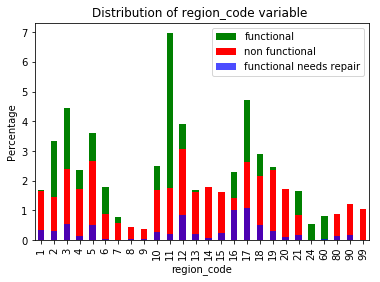

In [52]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='region_code')
((train_data[train_data.status_group=='non functional'].region_code.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='region_code')
((train_data[train_data.status_group=='functional needs repair'].region_code.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='region_code')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of region_code variable ')
plt.xlabel('region_code')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

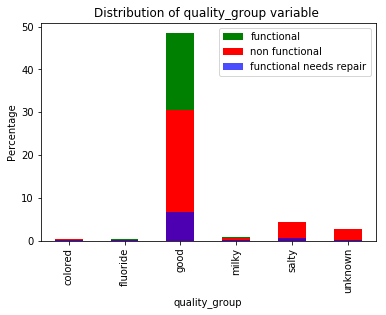

In [53]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='quality_group')
((train_data[train_data.status_group=='non functional'].quality_group.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='quality_group')
((train_data[train_data.status_group=='functional needs repair'].quality_group.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='quality_group')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of quality_group variable ')
plt.xlabel('quality_group')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

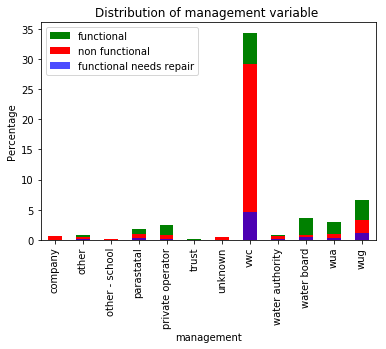

In [54]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='management')
((train_data[train_data.status_group=='non functional'].management.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='management')
((train_data[train_data.status_group=='functional needs repair'].management.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='management')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of management variable ')
plt.xlabel('management')
plt.ylabel('Percentage')

Text(0, 0.5, 'Percentage')

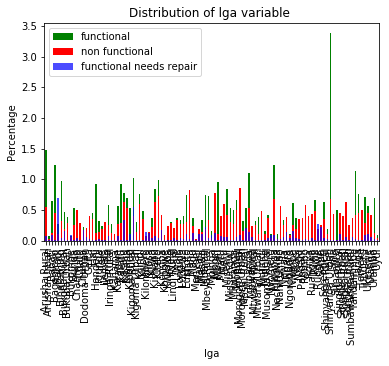

In [55]:
plt.show()
ax = ((train_data[train_data.status_group=='functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='g', x='lga')
((train_data[train_data.status_group=='non functional'].lga.value_counts().sort_index()/len(train_data.status_group))*100).plot(kind='bar',color='r', x='lga')
((train_data[train_data.status_group=='functional needs repair'].lga.value_counts().sort_index()/len(train_data.status_group)*100)).plot(kind='bar',color='b',alpha= 0.7, ax= ax, x='lga')
ax.legend(["functional", "non functional","functional needs repair"])
plt.title('Distribution of lga variable ')
plt.xlabel('lga')
plt.ylabel('Percentage')

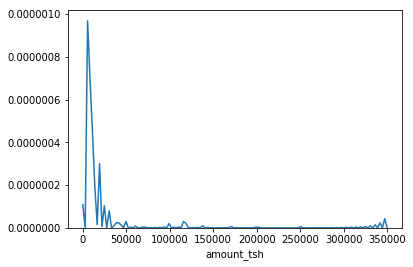

<Figure size 1440x1080 with 0 Axes>

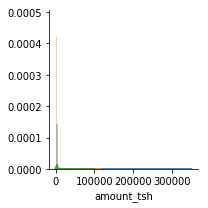

In [56]:
sns.distplot(train_data['amount_tsh'], hist = False, kde = True)
plt.figure(figsize=(20,15))
g = sns.FacetGrid(train_data, hue="status_group")
g = g.map(sns.distplot, "amount_tsh")

<Figure size 1440x1080 with 0 Axes>

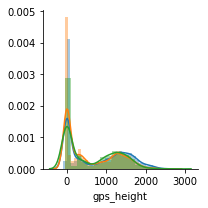

In [57]:
#sns.distplot(train_data['gps_height'], hist = False, kde = True)
plt.figure(figsize=(20,15))
g = sns.FacetGrid(train_data, hue="status_group")
g = g.map(sns.distplot, "gps_height")

<Figure size 1440x1080 with 0 Axes>

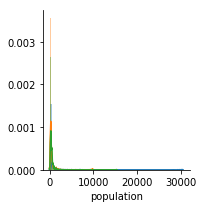

In [58]:
#sns.distplot(train_data['population'], hist = False, kde = True)
plt.figure(figsize=(20,15))
g = sns.FacetGrid(train_data, hue="status_group")
g = g.map(sns.distplot, "population")

<Figure size 1440x1080 with 0 Axes>

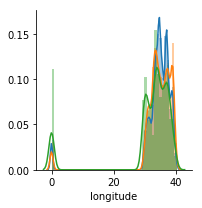

In [59]:
#sns.distplot(train_data['longitude'], hist = False, kde = True)
plt.figure(figsize=(20,15))
g = sns.FacetGrid(train_data, hue="status_group")
g = g.map(sns.distplot, "longitude")

In [60]:
from matplotlib import pyplot as plt

In [61]:
pairplot = train_data[['amount_tsh',
           'date_recorded',
           'gps_height','longitude','latitude','population','construction_year','status_group']]


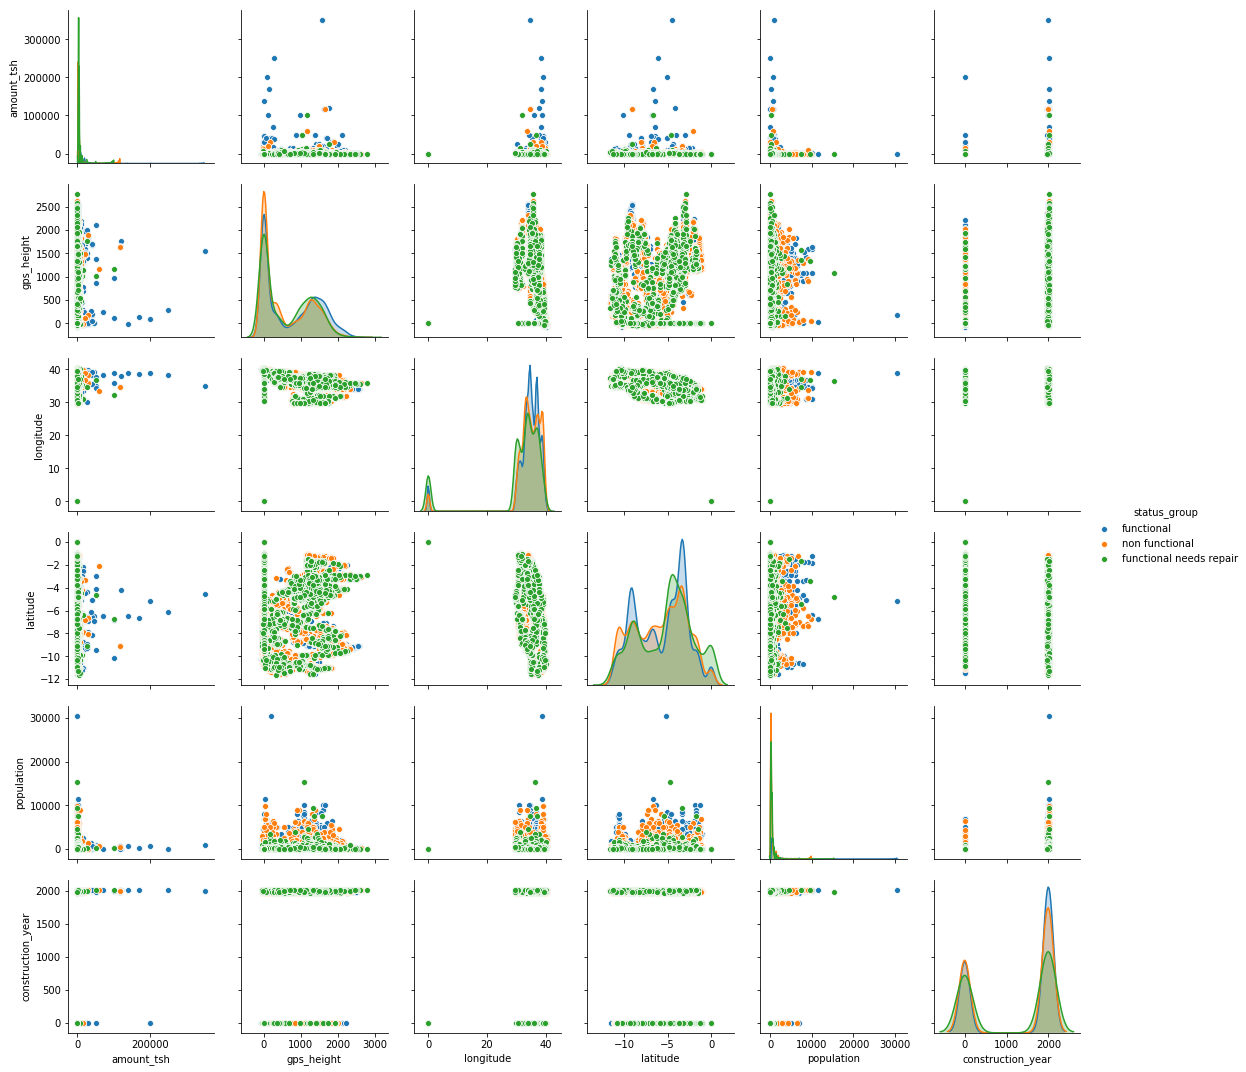

In [62]:
sns.pairplot(pairplot, hue="status_group")

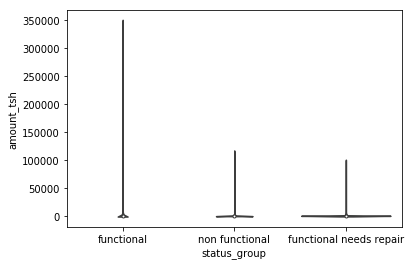

In [63]:
sns.violinplot(x='status_group', y='amount_tsh', data=train_data)

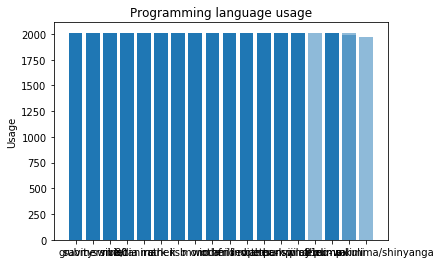

In [64]:
plt.bar(train_data.extraction_type, train_data.construction_year, align='center', alpha=0.5)
plt.ylabel('Usage')
plt.title('Programming language usage')
plt.show()
